#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


In [2]:
#!pip install pprintpp
#!pip install scipy

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import requests
import io
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset
#Comment the below 4 lines if you are loading the data from your local drive
# url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
# #Use this code to overcome SSL verification error when accessing the above https URL
# s = requests.get(url).content
# data = pd.read_csv(io.StringIO(s.decode('utf-8')))

#Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    #Mount the google drive
    from google.colab import drive
    drive.mount('/content/drive')
    data = pd.read_csv('/content/drive/MyDrive/card_transdata.csv') #Read the data from the csv file    
else:
    data = pd.read_csv('card_transdata.csv')

In [4]:
# Set display options to control wrapping
pd.set_option('display.max_columns', None)  # Do not truncate the list of columns
pd.set_option('display.max_rows', None)     # Do not truncate the list of rows
pd.set_option('display.width', 1000)        # Set the display width to a large value
pd.set_option('display.max_colwidth', 50)   # Set the maximum column width
pd.set_option('display.colheader_justify', 'left')  # Justify column headers to the left

In [5]:
#Examine dataset

print("\nShape of data")
print(data.shape)

print("\n--- First 5 rows of data ---")
print(data.head(5))

print("\n--- Last 5 rows of data ---")
print(data.tail(5))


Shape of data
(1000000, 8)

--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  ratio_to_median_purchase_price  repeat_retailer  used_chip  used_pin_number  online_order  fraud
0  57.877857           0.311140                        1.945940                        1.0              1.0        0.0              0.0           0.0  
1  10.829943           0.175592                        1.294219                        1.0              0.0        0.0              0.0           0.0  
2   5.091079           0.805153                        0.427715                        1.0              0.0        0.0              1.0           0.0  
3   2.247564           5.600044                        0.362663                        1.0              1.0        0.0              1.0           0.0  
4  44.190936           0.566486                        2.222767                        1.0              1.0        0.0              1.0           0.0  

--- Last 5 rows of data ---
 

In [6]:
#print info
print("\n--- Information about the data ---")
print(data.info())


--- Information about the data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None


<B>Observation:</B> The dataset has the following columns:

- <b>distance_from_home:</b> Distance of the retailer where transaction was made, from home of the customer, in miles.
- <b>distance_from_last_transaction:</b> Distance of current transaction from the prior transaction, in miles.
- <b>ratio_to_median_purchase_price:</b> This variable shows how that purchase price in the transaction compares to the average price in the dataset. A value of 1 indicates that the purchase price is same as the average price, a value > 1 indicates that the item purchased is more expensive than the median, while a value < 1 indicates it's cheaper.
- <b>repeat_retailer:</b> This is an indicator variable that indicates if there were multiple transactions made with specific retailers 0 = No, 1 = Yes. Note that the actual details of the retailer are not provided.
- <b>used_chip:</b> Indicator variable to show if the customer used a card with a chip or not (0 = No, 1 = Yes)
- <b>used_pin_number:</b> This is an indicator variable to show if the customer used a pin or not (0 = No, 1 = Yes)
- <b>online_order:</b> This is an indicator variable to show if this was an online order or not (0 = No, 1 = Yes)
- <b>fraud:</b> The target variable indicating if the given transaction was fraudulent or not. (0 = No, 1 = Yes)

In [7]:
# Print summary stats
print("\n--- Summary Statistics ---")
print(np.round(data.describe().T,2))


--- Summary Statistics ---
                                count      mean   std    min  25%   50%   75%    max     
distance_from_home              1000000.0  26.63  65.39  0.0  3.88  9.97  25.74  10632.72
distance_from_last_transaction  1000000.0   5.04  25.84  0.0  0.30  1.00   3.36  11851.10
ratio_to_median_purchase_price  1000000.0   1.82   2.80  0.0  0.48  1.00   2.10    267.80
repeat_retailer                 1000000.0   0.88   0.32  0.0  1.00  1.00   1.00      1.00
used_chip                       1000000.0   0.35   0.48  0.0  0.00  0.00   1.00      1.00
used_pin_number                 1000000.0   0.10   0.30  0.0  0.00  0.00   0.00      1.00
online_order                    1000000.0   0.65   0.48  0.0  0.00  1.00   1.00      1.00
fraud                           1000000.0   0.09   0.28  0.0  0.00  0.00   0.00      1.00


<B>Observations from Summary Statistics:</B>

- The columns distance_from_home and distance_from_last_transaction are skewed since their mean and median values are not the same.
- The columns distance_from_home, distance_from_last_transaction and ratio_to_median_purchase_price appears to have outliers since their max values are much higher than the mean values. This is also confirmed by the box plots below.
- The column repeat_retailer has more 1 values than 0 since it's mean value is > 0.5.
- The column used_chip has more 0 values than 1 since it's mean value is < 0.5.
- The column used_pin_number has more 0 values than 1 since it's mean value is < 0.5.
- The column online_order has more 1 values than 0 since it's mean value is > 0.5.


In [8]:
# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')


--- Event Rate ---
Event Rate: 8.74%


<B>Observations:</B> 
- Fraud detection datasets are often highly imbalanced, with a small percentage of transactions being fraudulent. The event rate helps quantify this imbalance, which is essential for selecting appropriate modeling techniques and evaluation metrics.
- An event rate of 8.74% indicates that the dataset is imbalanced, with a relatively small proportion of transactions being fraudulent. This is common in fraud detection datasets, where the majority of transactions are legitimate.

<H4>Check for missing values and duplicate rows</H4>

In [9]:
#Check for duplicates
print("\n--- Check for duplicates ---")
dups = data.duplicated()
print(dups.sum())


--- Check for duplicates ---
0


<B>Observation:</B> There are no duplicate rows in the dataset.

In [10]:
#Check for missing values
print("\n--- Missing Values ---")
print(data.isna().sum())


--- Missing Values ---
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


<B>Observation:</B> There are no missing values in the dataset.


--- Boxplots for detecting outliers---


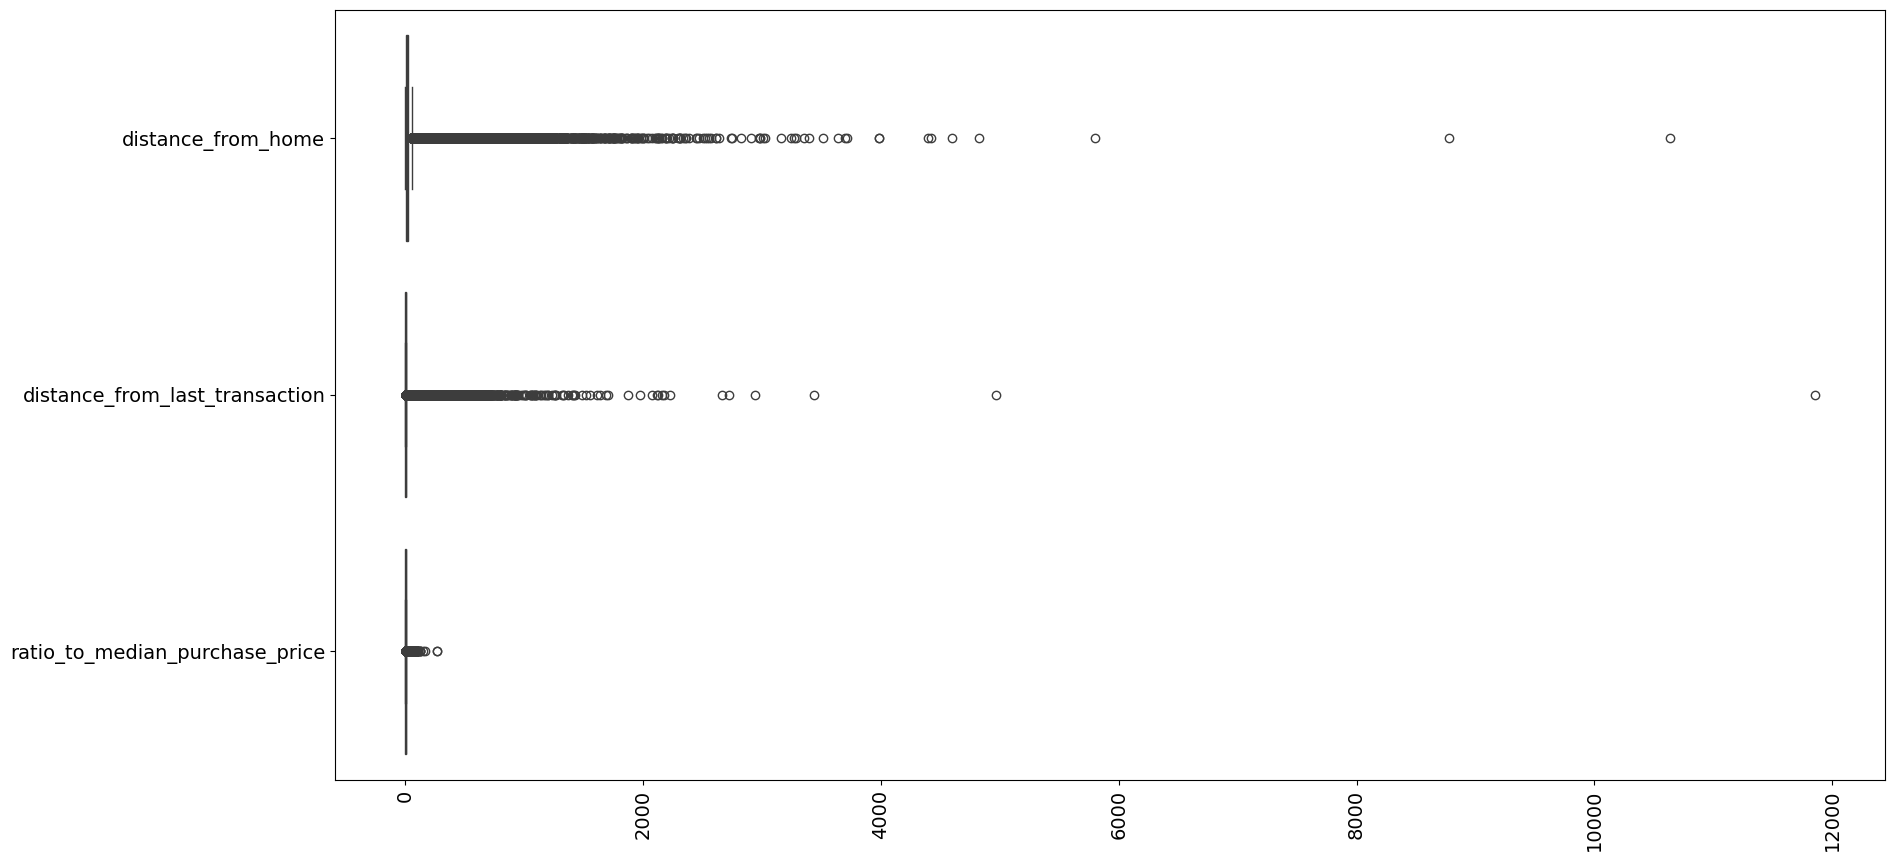

In [11]:
#Draw horizontal boxplots for the continuous variables and look for outliers
#rotate the display of the x-axis labels for easy reading
print("\n--- Boxplots for detecting outliers---")
#do not show box plots for the 'boolean' variables : 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order' and 'fraud'
box_plot_data = data.drop(['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'], axis=1)
plt.figure(figsize=(20,10))
sns.boxplot(data=box_plot_data, orient='h')
#increase the font size of x-axis and y-axis labels for easy reading
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#List the outliers in the dataset
print("\n--- Counts of Outliers for each Column ---")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(outliers)

#Print the rows with outliers in the dataset
print("\n--- Rows with Outliers ---")
print(data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)])

#Print the count of rows with outliers
print("\n--- Count of Rows with Outliers ---")
print(data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)].shape)


--- Counts of Outliers for each Column ---
distance_from_home                103631
distance_from_last_transaction    124367
ratio_to_median_purchase_price     84386
repeat_retailer                   118464
used_chip                              0
used_pin_number                   100608
online_order                           0
fraud                              87403
dtype: int64

--- Rows with Outliers ---


In [ ]:
#check the count of rows with outliers that are fraud and non-fraud
print("\n--- Count of Rows with Outliers that are Fraud and Non-Fraud ---")
print(data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]['fraud'].value_counts())

<B>Observations</B>
- Nearly half the dataset has outliers.
- Also, a large number of rows (~360K) contain outliers and yet represent non-fraudulent data.
- Hence we will not treat the outliers and let them remain.

In [ ]:
#Create a line plot of the numeric columns
print("\n--- Line plots for numeric columns ---")
plt.figure(figsize=(20,10))
#exclude the indicator columns from the line plot, as they are binary
#exclude the fraud column as it is the target variable
numeric_columns_all = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns_all.drop(['fraud', 'used_chip', 'used_pin_number', 'online_order', 'repeat_retailer'])
#create separate line plots for each column
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 1, i+1)
    plt.plot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

<H4>Data Imbalance</H3>

In [ ]:
#Check for data imbalance
print("\n--- Data Imbalance ---")
print(data['fraud'].value_counts())

#Plot the data imbalance
import matplotlib.pyplot as plt
import seaborn as sns

#Plot histogram of the target variable to show the imbalance in the dataset
plt.figure(figsize=(10,6))

ax = sns.histplot(data['fraud'], kde=True, color="red")
plt.title('Histogram of Fraud')
# Annotate the counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

<B>Observation:</B> The dataset is imbalanced as the target variable 'fraud' has a low number of rows (87403) for the class i.e fraud = Yes (1), and a very large number of rows (912597) for the class i.e. fraud = No (0). 
This is somewhat expected since, in a normal situation, the vast majority of financial transactions should be valid and only a minority should be fraudulent.

<H3>Bivariate Analysis<H3>

In this section we analyze pairs of variables to look for correlations between them.

<H4>Correlation Heatmap</H4>

In [ ]:
#Check for correlation between the variables
print("\n--- Correlation between Variables ---")
correlation = data.corr()
print(correlation)

#increase the font size of the labels in the heatmap
sns.set(font_scale=1.4)

#Plot the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<H4>Bar chart showing correlation of columns w.r.t target variable</H4>

In [ ]:
#plot a bar chart of the correlation values of the variables with the target variable
print("\n--- Correlation with Target Variable ---")

#set the font size chart
plt.rcParams.update({'font.size': 10})
#set the font size for the x and y axis labels
plt.rcParams.update({'xtick.labelsize': 10, 'ytick.labelsize': 10})

#change the color of the bars to light blue
#rotate the chart horizontally for easy reading
correlation['fraud'].sort_values(ascending=False).plot(kind='barh', color='lightblue')

#draw a vertical line at 0
plt.axvline(x=0, color='red', linewidth=0.5)
#show the values at the end of the bars
#add a gap between the end of the bar and the value
for index, value in enumerate(correlation['fraud'].sort_values(ascending=False)):
    plt.text(value, index, str(round(value,2)), va='center')
#increase font size of title
plt.title('Correlation with Target Variable', fontsize=12)
plt.tight_layout()
plt.show()

<B>Correlation Observations:</B> 
- The 'ratio_to_median_purchase_price' feature variable shows a moderate positive correlation with the target variable 'fraud'. This implies that the purchase of higher value products is more often fraudulent than lower value products.
- The variables 'online_order' and 'distance_from_home' also show a positive correlation with fraud, indicating that fraudulent transactions may typically occur online or when the customer is away from home.
- The used_pin variable is negatively correlated with fraud, indicating that use of a pin could secure transactions against fraud.
- The repeat_retailer does not have any correlation with the target variable. This implies that 

<H4>Pair Plots</H4>

In [ ]:
#Note: Takes 1-2 minutes to run
#Create a pairplot of the numeric columns
print("\n--- Pairplot of Numeric Columns ---")
#reduce the font size of the labels for better readability
sns.set(font_scale=0.5)
sns.pairplot(data[numeric_columns], diag_kind='kde')
plt.tight_layout()
plt.show()

<H3>Scaling of numeric variables</H3>

In [ ]:
#Create a line plot of the numeric columns
print("\n--- Line plots for numeric columns after min-max and standard scaling ---")
plt.figure(figsize=(20,10))
#exclude the indicator columns from the line plot, as they are binary
#exclude the fraud column as it is the target variable
numeric_columns_all = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns_all.drop(['fraud', 'used_chip', 'used_pin_number', 'online_order', 'repeat_retailer'])
#create separate line plots for each column
for i, col in enumerate(numeric_columns):
    #increase the font size of the title for better readability
    plt.rc('axes', titlesize=10)
    
    #increase the x and y axis font size for better readability
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)

    plt.subplot(3, 1, i+1)
    plt.plot(data[col])
    plt.title(col, fontsize=12)
plt.tight_layout()
plt.show()

<B>Observation:</B> Due to standard scaling, all feature columns now have means close to 0 and standard deviations close to 1. 

<B>Prepare Dataset for Training:</B>

In [ ]:
# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
# Use stratification to ensure that the event rate is maintained in the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n Shape of features in the training data")
print(X_train.shape)

print("\n Shape of features in the test data")
print(X_test.shape)

<H3>Model construction and training</H3>

<H4>Decision Tree Classifier Model</H4>
In this section, we will build and train a Decision Tree Classifier model. This model will just be used for comparision with the target model which is based on Random Forest algorithm.

In [ ]:
print("\n--- Decision Tree Model Construction and Training ---")

# Initialize a decision tree classifier
# max_depth is maximum number of levels in the tree
# random_state is the seed value for the random number generator, to ensure reproducibility
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42) 

# Train the model on the training data
model_dt.fit(X_train, y_train)

<H4> Decision Tree Model Valuation:</H4>

In [ ]:

print("\n--- Decision Tree Model Performance Metrics ---")

# Make predictions on the test data
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\n--- Decision Tree Confusion Matrix: ---")
print(confusion_dt)
print("\n--- Decision Tree Classification Report: ---")
print(classification_rep_dt)

print("\n--- Tree Diagram Of The Decision Tree Model ---")
# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model_dt, 
          filled=True, 
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

<B> Performance Evaluation for Decision Tree Model:</B>

-Overall, the Decision Tree Model is performing well, with F1-score of 0.99 for class 0 (non-fraud) and 0.89 for class 1 (fraud)
-Due to data imbalance, the precision (0.99) and recall (0.99) for class 0 (non-fraud) is higher than the precision (0.87) and recall (0.91) for class 1 (fraud) 

<H4> Random Forest Classifier Model </H4>
In this section, we build and train a baseline Random Forest classifier model.

In [ ]:
#Utility function to plot the confusion matrix
def plot_confusion_matrix(confusion_rf):
    print("\n--- Confusion Matrix: ---")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_rf) 

    #Change the x-axis and y-axis labels: 0 - No Default, 1 - Default
    disp = disp.plot(cmap='YlGn')
    disp.ax_.set_xticklabels(['No Fraud', 'Fraud'], fontsize=8)
    disp.ax_.set_yticklabels(['No Fraud', 'Fraud'], fontsize=8)

    #Show the text True Positive, False Negative, False Positive, True Negative in the confusion matrix
    disp.ax_.text(0, 0, f"True Negatives\n\n", ha="center", va="center", color="white", fontsize=8)
    disp.ax_.text(0, 1, f"False Negatives\n\n", ha="center", va="center", color="black", fontsize=8)
    disp.ax_.text(1, 0, f"False Positives\n\n", ha="center", va="center", color="black", fontsize=8)
    disp.ax_.text(1, 1, f"True Positives\n\n", ha="center", va="center", color="black", fontsize=8)

    # #Change the font size of the values but do not redisplay the text in the confusion matrix
    # disp.ax_.text(0, 0, f"{confusion_rf[0,0]}\n\n", ha="center", va="center", color="white", fontsize=10)
    # disp.ax_.text(0, 1, f"{confusion_rf[1,0]}\n\n", ha="center", va="center", color="black", fontsize=10)
    # disp.ax_.text(1, 0, f"{confusion_rf[0,1]}\n\n", ha="center", va="center", color="black", fontsize=10)
    # disp.ax_.text(1, 1, f"{confusion_rf[1,1]}\n\n", ha="center", va="center", color="black", fontsize=10)

    #set the font size of the x and y axis labels
    disp.ax_.xaxis.label.set_size(8)
    disp.ax_.yaxis.label.set_size(8)

    #set the font size of the scale bar on the right side
    disp.ax_.images[-1].colorbar.ax.tick_params(labelsize=8)

    #draw border around the confusion matrix
    disp.ax_.spines['top'].set_color('black')
    disp.ax_.spines['bottom'].set_color('black')
    disp.ax_.spines['left'].set_color('black')
    disp.ax_.spines['right'].set_color('black')

    #draw a horizontal line to separate the actual and predicted labels
    disp.ax_.axhline(y=0.5, color='black', linewidth=1)
    disp.ax_.axvline(x=0.5, color='black', linewidth=1)

    #remove the white color grid lines
    disp.ax_.grid(False)

    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay 

print("\n--- Random Forest Model Performance Metrics ---")

#Initialize a decision tree classifier with default parameters
#max_depth is maximum number of levels in the tree
#set random_state to a fixed number for reproducibility
model_rf = RandomForestClassifier(max_depth=3, random_state=42) 

# Train the model on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\n--- Random Forest Confusion Matrix: ---")
print(confusion_rf)
print("\n--- Random Forest Classification Report: ---")
print(classification_rep_rf)

plot_confusion_matrix(confusion_rf)

<B>Random Forest Confusion Matrix Observations:</B>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

print("\n--- ROC-AUC Plot To Detect Overfitting in Random Forest Model ---")
# Get the predicted probabilities for the positive class on the training set
y_train_pred_rf = model_rf.predict_proba(X_train)[:, 1]

# Compute the ROC curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_rf)

# Compute the AUC score for the training set
auc_train = roc_auc_score(y_train, y_train_pred_rf)

# Get the predicted probabilities for the positive class on the test set
y_test_pred_rf = model_rf.predict_proba(X_test)[:, 1]

# Compute the ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_rf)

# Compute the AUC score for the test set
auc_test = roc_auc_score(y_test, y_test_pred_rf)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Training AUC = {auc_train:.2f}', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
#Set the x and y axis labels
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve')

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Display the legend
plt.legend(fontsize=10)

plt.show()

<H3>Comparative Analysis of Models</H3>

A comparative analysis of the Random Forest and Decision Tree models is provided below and consists of:
- <B>ROC Curve Analysis:</B> Here we compare the two binary classification models using the ROC (Receiver Operating Characteristic) curve.It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The area under the ROC curve (AUC) is a single scalar value that summarizes the overall performance of the model. A higher AUC value indicates a better model i.e. it can distinguish between the classes more effectively.
- <B>Model Metrics Comparison:</B>- A DataFrame is created to capture and display the performance metrics of each model in a tabular format. This provides a clear, concise way to compare the models' performance side-by-side. Bar charts are used to visually compare these metrics across different models. This visual representation aids in quickly discerning which models perform better in terms of accuracy, recall, and precision.

<H4>ROC Curve Analysis</H4>

In [ ]:
#Create ROC curve for the Random Forest and Decision Tree models and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Calculate the probabilities for the Random Forest and Decision Tree models
y_pred_prob_rf = model_rf.predict_proba(X_test)[:,1]
y_pred_prob_dt = model_dt.predict_proba(X_test)[:,1]

#Calculate the FPR, TPR and thresholds for the Random Forest and Decision Tree models
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

#Calculate the AUC for the Random Forest and Decision Tree models
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

#Plot the ROC curve for the Random Forest and Decision Tree models
plt.figure(figsize=(10,6))

#Plot the ROC curve for the Random Forest model
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='red')

#Plot the ROC curve for the Decision Tree model
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='blue')

#Plot the 45 degree line
plt.plot([0, 1], [0, 1], 'k--')

#increase the font size of the labels
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Set the x and y axis labels
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)

#Set the title of the plot
plt.title('ROC Curve')

#Display the legend
plt.legend(fontsize=10)

plt.tight_layout
#Show the plot
plt.show()


<B>ROC Curve Comparison Observations:</B>
- Both Random Forest and Decision Trees  have AUC = 1. This indicates that both models are able to perfectly distinguish between the positive and negative classes without any errors.

<H4>Model Metrics Comparison</H4>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming accuracy_dt, accuracy_rf, precision_dt, precision_rf, recall_dt, recall_rf, f1_dt, and f1_rf are already defined

# Collect the performance metrics in a DataFrame
# Obtain the performance metrics for the Decision Tree and Random Forest models for both
# Classes: Non-Fraud and Fraud
precision_dt_non_fraud = precision_score(y_test, y_pred_dt, pos_label=0)
recall_dt_non_fraud = recall_score(y_test, y_pred_dt, pos_label=0)
f1_dt_non_fraud = f1_score(y_test, y_pred_dt, pos_label=0)

precision_dt_fraud = precision_score(y_test, y_pred_dt, pos_label=1)
recall_dt_fraud = recall_score(y_test, y_pred_dt, pos_label=1)
f1_dt_fraud = f1_score(y_test, y_pred_dt, pos_label=1)

precision_rf_non_fraud = precision_score(y_test, y_pred_rf, pos_label=0)
recall_rf_non_fraud = recall_score(y_test, y_pred_rf, pos_label=0)
f1_rf_non_fraud = f1_score(y_test, y_pred_rf, pos_label=0)

precision_rf_fraud = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf_fraud = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf_fraud = f1_score(y_test, y_pred_rf, pos_label=1)

metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Decision Tree', 'Random Forest', 'Decision Tree', 'Random Forest', 'Decision Tree', 'Random Forest'],
    'Metric': ['Accuracy', 'Accuracy', 'Precision', 'Precision', 'Recall', 'Recall', 'F1 Score', 'F1 Score'],
    'Non-Fraud': [accuracy_dt, accuracy_rf, precision_dt_non_fraud, precision_rf_non_fraud, recall_dt_non_fraud, recall_rf_non_fraud, f1_dt_non_fraud, f1_rf_non_fraud],
    'Fraud': [accuracy_dt, accuracy_rf, precision_dt_fraud, precision_rf_fraud, recall_dt_fraud, recall_rf_fraud, f1_dt_fraud, f1_rf_fraud]
})

#combine Model and Metric columns to create a new column
metrics['Model_Metric'] = metrics['Model'] + ' ' + metrics['Metric']

# Print the performance metrics dataframe
print("\n--- Performance Metrics for Decision Tree and Random Forest Models ---")
print(np.round(metrics,2))

# Plot the horizontal bar chart
# Use a different color for each metric
metrics.set_index('Model_Metric').plot(kind='barh', figsize=(10, 4))
plt.title('Comparison of Decision Tree and Random Forest Models')
plt.xlabel('Score', fontsize=10)
plt.ylabel('Model_Metric', fontsize=10)
#Increase font size for x and y axis labels
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.xlim(0, 1)
#increas the font size of the legend
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

<B>Comparison of Metrics of Decision Tree and Random Forest Models :</B>

| Class      | Metric         | Decision Tree | Random Forest  | Comments       |
|------------|----------------|---------------|----------------|----------------|
| N/A | Accuracy   | 0.98         | 0.97           | DT model has slightly higher accuracy, but due to imbalanced data, this metric is not significant. |
| 0 (Non-Fraud) | Precision  | 0.99           | 0.97           | RF model has slightly lower precision for class 0. This implies that the DT model is more accurate in its predictions of the non-fraudulent class and is less likely to incorrectly classify legitimate transactions as fraudulent. |
| 0 (Non-Fraud) | Recall     | 0.99           | 1.00           | RF model has slightly higher recall for class 0. This implies that the RF model is slightly more effective at identifying all the relevant instances of the non-fraudulent class.  |
| 0 (Non-Fraud) | F1 Score   | 0.99           | 0.99          | RF has same F1 score for class 0, as DT. |
| 1 (Fraud)     | Precision  | 0.87           | 1.00           | RF model has higher precision for class 1. This implies that the RF model is more accurate in its predictions for the fraudulent class and is more likely to correctly classify illegitimate transactions as fraudulent. | |
| 1 (Fraud)     | Recall     | 0.91           | 0.70           | DT model has significantly higher recall for class 1.This implies that the DT model is much more effective at identifying all the relevant instances of the fraudulent class.  | |
| 1 (Fraud)     | F1 Score   | 0.89           | 0.82           | Decision Tree has a higher F1 score for class 1. This is due to higher recall and precision scores for class 1.|

Overall, while both models perform well, the Decision Tree model is better at identifying fraudulent transactions (higher recall), whereas the Random Forest model is better at correctly identifying non-fraudulent transactions (higher precision).

<H4>Functional Comparison of Decision Tree and RandomForest Models:</H4>

<B>Decision Tree Model:</B>

|Pros | Cons|
|------|------|
|Simplicity and Interpretability: Decision trees are easy to understand and interpret. The tree structure allows for clear visualization of the decision-making process.|Overfitting: Decision trees are prone to overfitting, especially when the tree is deep and complex. This can lead to poor generalization to new data.|
|Non-Parametric: Decision trees do not assume any underlying distribution of the data, making them flexible and applicable to a wide range of problems. |Instability: Small changes in the data can result in significantly different tree structures, making decision trees sensitive to variations in the training data.|
|Handling of Non-Linear Relationships: Decision trees can capture non-linear relationships between features and the target variable. |Bias-Variance Tradeoff: Decision trees can have high variance and low bias, leading to overfitting. Pruning techniques can help mitigate this issue but may not always be sufficient.|
|Feature Importance: Decision trees provide a measure of feature importance, helping to identify the most influential features in the dataset. |
|Minimal Data Preparation: Decision trees require little data preprocessing, such as normalization or scaling.|


<B>Random Forest Model:</B>

|Pros|Cons|
|------|------|
|Reduced Overfitting: Random forests combine multiple decision trees to reduce overfitting. By averaging the predictions of many trees, they improve generalization to new data.|Complexity: Random forests are more complex and computationally intensive compared to individual decision trees. |Training and prediction times can be longer, especially with a large number of trees.|
Robustness: Random forests are more robust to variations in the training data compared to individual decision trees. They are less sensitive to outliers and noise.| Interpretability: While individual decision trees are easy to interpret, random forests are more challenging to interpret due to the ensemble of multiple trees.
|Improved Accuracy: Random forests generally provide higher accuracy and better performance compared to individual decision trees.|Memory Usage: Random forests require more memory to store multiple trees, which can be a limitation for large datasets|
|Feature Importance: Like decision trees, random forests provide a measure of feature importance, helping to identify the most influential features.|
|Handling of Missing Values: Random forests can handle missing values by using surrogate splits or by averaging predictions from trees that do not use the missing feature.|

<B>Summary:</B>
- Decision Trees are simple, interpretable, and easy to visualize, but prone to overfitting and instability.
- Random Forest Models are more robust, accurate, and less prone to overfitting, but more complex, computationally intensive, and harder to interpret.

# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


<H3>Balancing The Data</H3>

During Exploratory Data Analysis, we have noted that the data is imbalanced i.e. there are more representatives of Class 0 (non-fraud) than of Class 1 (fraud). If the imbalance is very high (>10), it can be addressed by using SMOTE algorithm to synthesize additional data for class 0 by sampling existing data. To avoid data leakage/contamination, SMOTE needs to be applied only to training data after splitting.

In [ ]:
#print imbalance ratio
print("Majority class count:", y_train.value_counts()[0])
print("Minority class count:", y_train.value_counts()[1])
print("Imbalance ratio before SMOTE oversampling:", np.round(y_train.value_counts()[0] / y_train.value_counts()[1],2))
 
# use SMOTE to oversample the minority class in the traiing set if the 
# imbalance ratio is greater than 10
from imblearn.over_sampling import SMOTE
if y_train.value_counts()[0] / y_train.value_counts()[1] > 10:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Imbalance ratio after SMOTE oversampling:", np.round(y_train.value_counts()[0] / y_train.value_counts()[1],2))
    #plot histogram of the target variable after smote oversampling to confirm that
    #the classes are balanced
    plt.figure(figsize=(10,6))
    sns.histplot(y_train, kde=True, color="blue")
else:
    print("No need for SMOTE oversampling")

<H4>Cross-validation</H4>

Cross-validation is a statistical technique used to evaluate the performance and generalizability of a machine learning model. It involves partitioning the dataset into multiple subsets, training the model on some subsets (training set), and evaluating it on the remaining subsets (validation set). This process is repeated multiple times, and the results are averaged to provide a more reliable estimate of the model's performance.

K-Fold Cross-Validation: The dataset is divided into k equal-sized folds. The model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, with each fold used as the validation set once. The results are averaged to obtain the final performance metric.

In [ ]:
#Note: This block takes 3-4 minutes to run without n_jobs=-1 parameter setting
print("\n--- Random Forest Model Performance Metrics After Balancing Data and 5-fold Cross Validation---")
#Create a K-fold cross-validation object and use it for training the model, with K = 5
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

#print value counts of the target variable in the training set
print("Value counts of the target variable in the training set")
print(y_train.value_counts())

#Create a KFold object with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Initialize a new instance of Random Forest classifier to use in cross-validation
#set random_state to a fixed number for reproducibility
model_rf2 = RandomForestClassifier(max_depth=3, random_state=42,n_jobs=-1)

#Train the model using cross-validation
cv_scores = cross_val_score(model_rf2, X_train, y_train, cv=kf)

#Print the cross-validation scores
print("\n--- Cross-Validation Scores ---")
print(cv_scores)

#Print the mean and standard deviation of the cross-validation scores
print(f"Mean CV Score: {cv_scores.mean():.2f}")
print(f"CV Score Standard Deviation: {cv_scores.std():.2f}")

#Train the Random Forest model on the training data
model_rf2.fit(X_train, y_train)

#Make predictions on the test data
y_pred_rf2 = model_rf2.predict(X_test)

#Evaluate the model
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
confusion_rf2 = confusion_matrix(y_test, y_pred_rf2)
classification_rep_rf2 = classification_report(y_test, y_pred_rf2)

#Print the results
print(f"Accuracy: {accuracy_rf2:.2f}")
print("Confusion Matrix:")
print(confusion_rf2)
print("Classification Report:")
print(classification_rep_rf2)

#Plot the confusion matrix
plot_confusion_matrix(confusion_rf2)

<B>Observations after retraining model with balanced target variable:</B>

The precision, recall and f1-score have improved for class 1 (fraud) as compared a model trained on an unbalanced target variable. 

<H4>Feature Importance Analysis</H4>

<B>Feature Importance from Cross-Validated Model:</B>

In [ ]:
feature_importance = model_rf2.feature_importances_
# Original feature names
feature_names = data.columns[:-1]

# Verify the length of feature names matches the length of feature importances
assert len(feature_names) == len(feature_importance), "Feature name and importance length mismatch"

# Create the Feature Importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the Feature Importance DataFrame
print("\n--- Feature Importance Table ---")
print(importance_df)

print("\n--- Feature Importance Bar Chart ---")
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
#print the values at the end of the bars. Leave a gap between the end of the bar and the value
for i, v in enumerate(importance_df['Importance'].head(10)):
    plt.text(v, i, round(v,2), ha='left', va='center', fontsize=10)

#increase the font size of the x and y axis labels
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)

plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

<B>Feature Importance using Gini Coefficient:</B>

In [ ]:
print("\n--- Feature Importance Gini Coefficient Bar Chart ---")

importance_dt = model_dt.feature_importances_

# Sort the feature importance in ascending order
indices_dt = np.argsort(importance_dt)

# Create a Gini coefficient plot for the Decision Tree model
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_dt)), importance_dt[indices_dt], align='center')
plt.yticks(range(len(importance_dt)), X_train.columns[indices_dt], rotation=0)
plt.title('Gini Coefficient Plot for Decision Tree Model')
# Increase font size of the x and y axis labels
plt.xlabel('Gini Coefficient', fontsize=10)
plt.ylabel('Features', fontsize=10)

# Increase the font size of the labels
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Show values at the end of the bars. Leave a gap between the end of the bar and the value
for i, v in enumerate(importance_dt[indices_dt]):
    plt.text(v, i, round(v, 2), ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

<B>Gini Coefficient Observations:</B>
The Gini Coefficient chart helps us to determine the best feature to use as the root node for the decision tree. To do this, we will calculate the Gini impurity for each feature and select the feature with the lowest Gini impurity.

<B>Feature Importance Observations</B>

Both the feature importances chart and the Gini coefficients chart indicate that:
- The feature with the highest importance is <B>ratio_to_median_purchase_price</B>. This implies that transactions with higher prices are more likely to be fraudulent.
- The feature with the least importance is <B>repeat_retailer</B>. This implies that fraudulent transactions can happen at the same retailer or at different retailers.
- The features <B>online_order</B> and <B>distance_from_home</B> are next in importance respectively, implying that fraudulent orders are less likely in transactions made in person or closer to the customer's home.
- The feature <B>used_pin</B> is next in importance, implying that transactions involving the entry of a pin, like those using a debit card for instance, are more susceptible to fraud.

<H4>Re-training the model with reduced features</B>

In [ ]:
#Note: This block of code takes 5-6 minutes to run without njobs=-1 parameter setting
print("\n--- Random Forest Model Performance Metrics After Reducing Features---")
# Create a K-fold cross-validation object and use it for training the model, with K = 5
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#drop the feature repeat_retailer as it has low feature importance
X_train.drop('repeat_retailer', axis=1, inplace=True)
X_test.drop('repeat_retailer', axis=1, inplace=True)

#Create a KFold object with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Initialize a new instance of Random Forest classifier to use in cross-validation
#set random_state to a fixed number for reproducibility
model_rf2 = RandomForestClassifier(max_depth=3, random_state=42,n_jobs=-1)

#Train the model using cross-validation
cv_scores = cross_val_score(model_rf2, X_train, y_train, cv=kf)

#Print the cross-validation scores
print("\n--- Cross-Validation Scores ---")
print(cv_scores)

#Print the mean and standard deviation of the cross-validation scores
print(f"Mean CV Score: {cv_scores.mean():.2f}")
print(f"CV Score Standard Deviation: {cv_scores.std():.2f}")

#Train the Random Forest model on the training data
model_rf2.fit(X_train, y_train)

#Make predictions on the test data
y_pred_rf2 = model_rf2.predict(X_test)

#Evaluate the model
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
confusion_rf2 = confusion_matrix(y_test, y_pred_rf2)
classification_rep_rf2 = classification_report(y_test, y_pred_rf2)

#Print the results
print(f"Accuracy: {accuracy_rf2:.2f}")
print("Confusion Matrix:")
print(confusion_rf2)
print("Classification Report:")
print(classification_rep_rf2)

#Plot the confusion matrix
plot_confusion_matrix(confusion_rf2)

<B>Observations after retraining model with reduced features:</B>

The precision, recall and f1-score have improved for class 1 (fraud) as compared a model trained on all features. 

<B>Comparison of Metrics of Random Forest Models Before and After Modifications:</B>

Note: 'tuning' => Balancing, 5-fold Cross-validation

| Class      | Metric         | Baseline RF   |'Tuned' RF with reduced Features    | 'Tuned' RF with all Features   | Comments       |
|------------|----------------|---------------|---------------|----------------|----------------|
| N/A | Accuracy   | 0.97        | 0.97 |1.00      |    Accuracy seems to better when using a tuned model with all features, but this metric is not considered for imbalanced datasets. |
| 0 (Non-Fraud) | Precision | 0.97      | 1.00 | 1.00                      |  Precision for class 0 has improved after tuning. |
| 0 (Non-Fraud) | Recall      | 1.00  | 0.97  |1.00                                  | The recall value for class 0 has reduced slightly after removing features.  |
| 0 (Non-Fraud) | F1 Score   | 0.99         | 0.98 |1.00                           | The F1 score class 0 has reduced slightly after removing features. |
| 1 (Fraud)     | Precision   | 1.00         | 0.74  |0.98                          | The precision for class 1 has reduced after removing features. But the tuned model with all features has comparable precison with baseline model. | |
| 1 (Fraud)     | Recall      | 0.70        | 1.00   |0.99                          | The recall of the tuned model has significantly improved for class 1, with and without removing features.  | |
| 1 (Fraud)     | F1 Score     | 0.82        | 0.85   |0.99                         | The tuned model has a higher F1 score for class 1 after removing features, but the tuned model with all features has the best F1 score for class 1.|

Overall, the 'tuned' RF model, with all features, has the best performance in identifying fraudulent transactions due to higher recall and F1 score.

<H3>Reflection and Discussion</H3>

We started with a Decision Tree model and proceeded to build a Random Forest (RF) model. 

The baseline RF model with default parameters performed well on Class 0 (Non-fraud) cases but did not perform that well on Class 1 (Fraud) cases, relative to the baseline DT model. 

We were able to build and train a high-performance fraud detection model by significantly improving the performance of the baseline RF model using the following techniques:

- We used SMOTE (Synthetic Minority Oversampling Technique) algorithm to smoothen out the imbalances in the training dataset. The training dataset originally had an overwhelming majority of rows in favor of Class 0, and SMOTE was used to sample and auto-generate more rows having target label Class 1. The testing dataset was left untouched.
- We used k-fold (k = 5) cross-validation during model training. It involves partitioning the dataset into k equal-sized folds, training the model on k-1 folds, and validating it on the remaining fold. This process is repeated k times, with each fold used as the validation set once. The results are averaged to provide a more reliable estimate of the model's performance. This also reduces overfitting.
- We carried out feature importance analysis to identify and remove unnecessary features and this reduced the overfitting as well as the training time.